In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score

In [35]:
# Cargamos el dataset
file_path = 'data_evaluacion_decoded.csv'
df = pd.read_csv(file_path)

# Mostramos las primeras filas del dataset
df.head()

,Unnamed: 0,edad,fnlwgt,educacion,educacion_num,estado_civil,relacion,ocupacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,0,39,77516,9,13,1,1,0,4,1,1,0,40,1,0,1
1,1,50,83311,9,13,0,0,3,4,1,0,0,13,1,2,1
2,2,38,215646,11,9,1,1,5,4,1,0,0,40,1,1,1
3,3,53,234721,1,7,0,0,5,2,1,0,0,40,1,1,1
4,4,28,338409,9,13,0,5,9,2,0,0,0,40,0,1,1


In [36]:
x=df.drop(['salario'], axis=1)
x

,Unnamed: 0,edad,fnlwgt,educacion,educacion_num,estado_civil,relacion,ocupacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo
0,0,39,77516,9,13,1,1,0,4,1,1,0,40,1,0
1,1,50,83311,9,13,0,0,3,4,1,0,0,13,1,2
2,2,38,215646,11,9,1,1,5,4,1,0,0,40,1,1
3,3,53,234721,1,7,0,0,5,2,1,0,0,40,1,1
4,4,28,338409,9,13,0,5,9,2,0,0,0,40,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,39,215419,9,13,1,1,9,4,0,0,0,36,1,1
48838,48838,64,321403,11,9,1,2,9,2,1,0,0,40,1,1
48839,48839,38,374983,9,13,0,0,9,4,1,0,0,50,1,1
48840,48840,44,83891,9,13,1,3,0,1,1,1,0,40,1,1


In [37]:
y=df['salario']
y

0        1
1        1
2        1
3        1
4        1
        ..
48837    1
48838    1
48839    1
48840    1
48841    0
Name: salario, Length: 48842, dtype: int64

In [38]:
# Dividir los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
svm_model = SVC(kernel='sigmoid')  # Puedes cambiar el kernel a 'rbf', 'poly', sigmoid, linear
svm_model.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [41]:
y_pred = svm_model.predict(x_test)

In [42]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.45      0.45      2338
           1       0.83      0.83      0.83      7431

    accuracy                           0.74      9769
   macro avg       0.64      0.64      0.64      9769
weighted avg       0.74      0.74      0.74      9769

Confusion Matrix:
 [[1042 1296]
 [1255 6176]]


In [43]:
# Evalaucion del modelo
print('Train Accuracy : %.5f' % svm_model.score(x_train, y_train))
print('Test Accuracy : %.5f' % svm_model.score(x_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Train Accuracy : 0.73816
Test Accuracy : 0.73887
Precisión del modelo: 0.7388678472719828


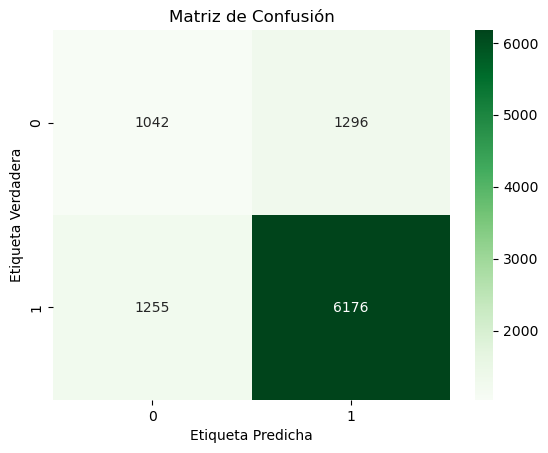

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
sns.heatmap(cm_df, annot=True, cmap='Greens', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()